# Outline
- K-means clustering
- Agglomerative clustering
- Evaluation

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
import numpy as np

color_map_1 = ListedColormap(['#0000aa', '#ff2020', '#ffaa20'])
color_map_2 = ListedColormap(['b', 'g', 'r', 'm', 'y', 'orange' ])

## 1. K-means
- Step 1: assigning each data point to the closest cluster center.
- Step 2: setting each cluster center as the mean of the data points that are assigned to it.

### 1.1 The first K-means model

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate isotropic Gaussian blobs, control the centers and standard deviations of each cluster. 
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [4]:
# predict labels: kmeans.labels_ or kmeans.predict(X)
print(kmeans.labels_)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [5]:
# cluster centers
kmeans.cluster_centers_

array([[ -6.58196786,  -8.17239339],
       [ -1.4710815 ,   4.33721882],
       [-10.04935243,  -3.85954095]])

In [6]:
X

array([[-7.94152277e-01,  2.10495117e+00],
       [-9.15155186e+00, -4.81286449e+00],
       [-1.14418263e+01, -4.45781441e+00],
       [-9.76761777e+00, -3.19133737e+00],
       [-4.53655648e+00, -8.40186288e+00],
       [-6.26302115e+00, -8.10666081e+00],
       [-6.38481234e+00, -8.47302970e+00],
       [-9.20490564e+00, -4.57687928e+00],
       [-2.76017908e+00,  5.55121358e+00],
       [-1.17104176e+00,  4.33091816e+00],
       [-1.00364080e+01, -5.56912090e+00],
       [-9.87589123e+00, -2.82386464e+00],
       [-7.17532921e+00, -8.77059017e+00],
       [-2.40671820e+00,  6.09894447e+00],
       [-4.87418245e+00, -1.00495890e+01],
       [-6.07854700e+00, -7.93969420e+00],
       [-6.83238762e+00, -7.47067670e+00],
       [-2.34673261e+00,  3.56128423e+00],
       [-1.03415662e+01, -3.90975169e+00],
       [-1.10926243e+01, -3.78396611e+00],
       [-6.50212109e+00, -7.91249101e+00],
       [-1.02639310e+01, -3.92073400e+00],
       [-6.81608302e+00, -8.44986926e+00],
       [-1.

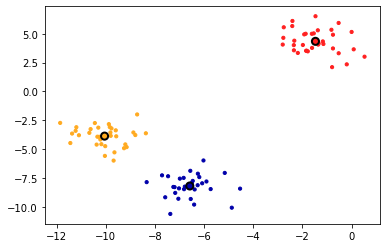

In [7]:

plt.scatter(X[:,0], X[:,1], s=10, c=kmeans.labels_, cmap=color_map_1)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            s=50, facecolors='none', edgecolors='black', zorder=50, linewidth=2,
            c=kmeans.predict(kmeans.cluster_centers_), cmap=color_map_1)

### 1.2 Try different cluster numbers

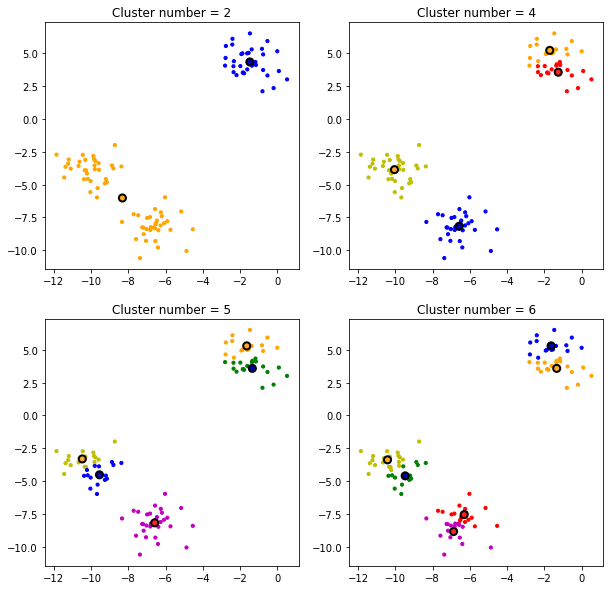

In [8]:

f, axarr = plt.subplots(2, 2) 
f.set_size_inches(10,10)

for i, cluster_num in enumerate([2, 4, 5, 6]):
    kmeans = KMeans(n_clusters=cluster_num)
    kmeans.fit(X)
    
    axarr[int(i/2)][i%2].scatter(X[:,0], X[:,1], s=10, c=kmeans.labels_, cmap=color_map_2)
    axarr[int(i/2)][i%2].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            s=50, facecolors='none', edgecolors='black', zorder=50, linewidth=2,
            c=kmeans.predict(kmeans.cluster_centers_), cmap=color_map_1)
    
    axarr[int(i/2)][i%2].set_title('Cluster number = {}'.format(cluster_num))

## 2. Agglomerative Clustering

Text(0, 0.5, 'Feature 1')

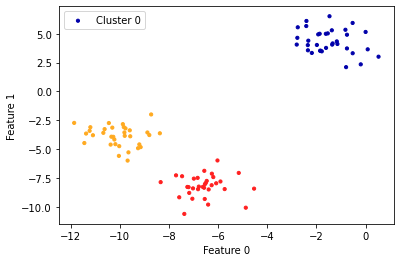

In [9]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1],  s=10, c=assignment, cmap=color_map_1)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Cluster distance')

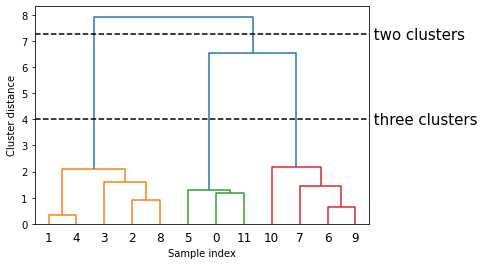

In [10]:
# import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

# apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)

# now we plot the dendrogram for the linkage_array containing the distances between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

## 3. Evaluation

#### With groundtruth

In [11]:
from sklearn import metrics

X, y = make_blobs(random_state=0)
y_pred = KMeans(n_clusters=3).fit_predict(X)
print(y)
print(y_pred)

# ARI
# close to 0.0 for random labeling independently of the number of clusters and samples and 
# exactly 1.0 when the clusterings are identical.
print(f'ARI = {metrics.adjusted_rand_score(y_pred,y)}')

# AMI
# The AMI returns 1 when the two partitions are identical. 
# The AMI is close to 0 when randomly labellings.
print(f'AMI = {metrics.adjusted_mutual_info_score(y_pred,y, average_method="arithmetic")}')

# NMI
# Score between 0.0 and 1.0. 1.0 stands for perfectly complete labeling
print(f'NMI = {metrics.normalized_mutual_info_score(y_pred,y, average_method="arithmetic")}')

[1 0 1 0 0 0 2 2 1 0 0 0 1 0 2 1 2 0 2 2 2 2 2 0 1 1 1 1 2 2 0 1 1 0 2 2 0
 1 1 2 2 1 1 0 0 0 1 1 2 2 2 1 0 1 2 2 1 1 0 1 1 2 2 2 2 1 0 2 1 0 2 0 0 1
 1 0 0 0 2 1 0 0 1 0 1 0 0 0 1 0 1 1 2 2 2 2 0 0 2 2]
[0 2 0 1 1 2 1 1 0 2 2 2 0 2 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 2 0 0 2 1 2 2
 0 0 1 1 0 0 2 2 2 0 0 1 1 2 0 2 0 1 1 0 0 2 0 0 1 1 1 1 0 2 1 0 2 1 0 1 0
 2 2 2 2 1 0 2 2 0 2 2 2 2 2 0 2 0 0 1 1 1 1 2 2 1 1]
ARI = 0.7251402595336714
AMI = 0.6870511099047656
NMI = 0.6929139975030331


#### Without groundtruth

In [12]:
from sklearn.metrics.cluster import silhouette_score
print(f"Cluster silhouette = {silhouette_score(X, y_pred)}")

y_rand = np.random.choice([0,1,2], size=len(X))
print(f"Random silhouette = {silhouette_score(X, y_rand)}")

Cluster silhouette = 0.448216009834362
Random silhouette = -0.04036296792194614


#### Compare different algorithms

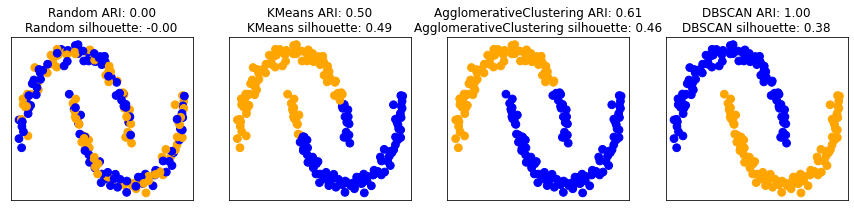

In [13]:
from sklearn.metrics.cluster import silhouette_score, adjusted_rand_score
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# generate data
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
X_scaled = StandardScaler().fit_transform(X)  # Rescale the data to zero mean and unit variance

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# plot random assignment
# create a random cluster assignment for reference:
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=color_map_2, s=60)
title = f"Random ARI: {adjusted_rand_score(y, random_clusters):.2f}" + '\n' +\
    f"Random silhouette: {silhouette_score(X_scaled, random_clusters):.2f}"
axes[0].set_title(title)

# plot clurstering algorithms
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=color_map_2, s=60)
    title = f"{algorithm.__class__.__name__} ARI: {adjusted_rand_score(y, clusters):.2f}" + '\n' + \
    f"{algorithm.__class__.__name__} silhouette: {silhouette_score(X_scaled, clusters):.2f}"
    ax.set_title(title)